In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_moons


### 生成非圓形分布的 2D 數據集

In [2]:
X, Y = make_moons(n_samples=300, noise=0.2, random_state=0)

### SVM 模型

In [3]:
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, Y)

SVC()

### 創建網格來繪製決策邊界

In [4]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### 創建 3D 圖

C:\Users\danny\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


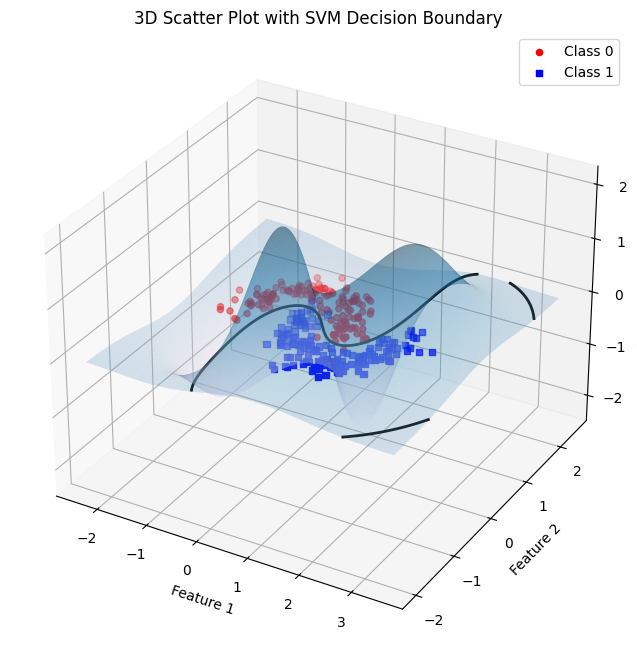

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪製數據點
ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], 0, color='red', marker='o', label='Class 0')
ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], 0, color='blue', marker='s', label='Class 1')

# 繪製決策邊界和間隔
ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.3, cmap=plt.cm.PuBu)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black', offset=0)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Scatter Plot with SVM Decision Boundary')
ax.legend()

plt.show()